In [1]:
class Graph:
    def __init__(self, directed=False):
        """
        Initialize the Graph.

        Parameters:
        - directed (bool): Specifies whether the graph is directed. Default is False (undirected).

        Attributes:
        - graph (dict): A dictionary to store vertices and their adjacent vertices.
        - directed (bool): Indicates whether the graph is directed.
        """
        self.graph = {}
        self.directed = directed
    
    def add_vertex(self, vertex):
        """
        Add a vertex to the graph.

        Parameters:
        - vertex: The vertex to add. It must be hashable.

        Ensures that each vertex is represented in the graph dictionary as a key with an empty list as its value.
        """
        if not isinstance(vertex, (int, str, tuple)):
            raise ValueError("Vertex must be a hashable type.")
        if vertex not in self.graph:
            self.graph[vertex] = []
    
    def add_edge(self, src, dest):
        """
        Add an edge from src to dest. If the graph is undirected, also add from dest to src.

        Parameters:
        - src: The source vertex.
        - dest: The destination vertex.

        Prevents adding duplicate edges and ensures both vertices exist.
        """
        if src not in self.graph or dest not in self.graph:
            raise KeyError("Both vertices must exist in the graph.")
        if dest not in self.graph[src]:  # Check to prevent duplicate edges
            self.graph[src].append(dest)
        if not self.directed and src not in self.graph[dest]:
            self.graph[dest].append(src)
    
    def remove_edge(self, src, dest):
        """
        Remove an edge from src to dest. If the graph is undirected, also remove from dest to src.

        Parameters:
        - src: The source vertex.
        - dest: The destination vertex.
        """
        if src in self.graph and dest in self.graph[src]:
            self.graph[src].remove(dest)
        if not self.directed and dest in self.graph and src in self.graph[dest]:
            self.graph[dest].remove(src)
    
    def remove_vertex(self, vertex):
        """
        Remove a vertex and all edges connected to it.

        Parameters:
        - vertex: The vertex to be removed.
        """
        if vertex in self.graph:
            # Remove any edges from other vertices to this one
            for adj in list(self.graph):
                if vertex in self.graph[adj]:
                    self.graph[adj].remove(vertex)
            # Remove the vertex entry itself
            del self.graph[vertex]
    
    def get_adjacent_vertices(self, vertex):
        """
        Get a list of vertices adjacent to the specified vertex.

        Parameters:
        - vertex: The vertex whose neighbors are to be retrieved.

        Returns:
        - List of adjacent vertices. Returns an empty list if vertex is not found.
        """
        return self.graph.get(vertex, [])
    
    def __str__(self):
        """
        Provide a string representation of the graph's adjacency list for easy printing and debugging.

        Returns:
        - A string representation of the graph dictionary.
        """
        return str(self.graph)

# Example usage:
try:
    g = Graph(directed=True)
    g.add_vertex('A')
    g.add_vertex('B')
    g.add_edge('A', 'B')
    g.add_edge('A', 'B')  # Attempt to add duplicate edge
    print(g)
except Exception as e:
    print(f"Error: {e}")

{'A': ['B'], 'B': []}


In [2]:
# You are an Expert Software Engineer and Site Reliability Engineer that puts code into production in large scale systems. I have an implementation of a “Directed Graph” in Python above
# -	Can you please analyze this and let me know what I would need to do to trust this in a Production environment from Security and Scalability perspective. 
# -	Also am I missing some key functionality which I should add?
# -	Just answer as recommendations in bullet and do not update the code yet

In [3]:
# Recommendations for Production Environment

# Security:
# - Validate inputs rigorously to prevent injection attacks or malformed data.
# - Ensure that the graph operations are thread-safe if accessed by multiple threads concurrently.
# - Implement logging for critical operations to monitor and audit changes to the graph.

# Scalability:
# - Optimize the data structure for large-scale graphs, possibly using adjacency lists or matrices.
# - Consider using libraries like NetworkX for more efficient graph operations.
# - Implement lazy loading or chunk processing if the graph data is too large to fit into memory.

# Missing Key Functionality:
# - Implement a method to check for cycles in the graph, especially since it's directed.
# - Add functionality to find the shortest path between two vertices.
# - Include methods for graph traversal (e.g., BFS, DFS).
# - Provide serialization and deserialization methods to save and load the graph from disk.
# - Add unit tests to ensure the correctness of all methods.

In [4]:
class Graph:
    def __init__(self, directed=False):
        """
        Initialize the Graph.

        Parameters:
        - directed (bool): Specifies whether the graph is directed. Default is False (undirected).

        Attributes:
        - graph (dict): A dictionary to store vertices and their adjacent vertices.
        - directed (bool): Indicates whether the graph is directed.
        """
        self.graph = {}
        self.directed = directed
    
    def add_vertex(self, vertex):
        """
        Add a vertex to the graph.

        Parameters:
        - vertex: The vertex to add. It must be hashable.

        Raises:
        - ValueError: If the vertex is not a hashable type.
        """
        if not isinstance(vertex, (int, str, tuple)):
            raise ValueError("Vertex must be a hashable type.")
        if vertex not in self.graph:
            self.graph[vertex] = []
    
    def add_edge(self, src, dest):
        """
        Add an edge from src to dest. If the graph is undirected, also add from dest to src.

        Parameters:
        - src: The source vertex.
        - dest: The destination vertex.

        Raises:
        - KeyError: If either src or dest vertices do not exist in the graph.
        """
        if src not in self.graph or dest not in self.graph:
            raise KeyError("Both vertices must exist in the graph.")
        if dest not in self.graph[src]:  # Check to prevent duplicate edges
            self.graph[src].append(dest)
        if not self.directed and src not in self.graph[dest]:
            self.graph[dest].append(src)
    
    def remove_edge(self, src, dest):
        """
        Remove an edge from src to dest. If the graph is undirected, also remove from dest to src.

        Parameters:
        - src: The source vertex.
        - dest: The destination vertex.
        """
        if src in self.graph and dest in self.graph[src]:
            self.graph[src].remove(dest)
        if not self.directed and dest in self.graph and src in self.graph[dest]:
            self.graph[dest].remove(src)
    
    def remove_vertex(self, vertex):
        """
        Remove a vertex and all edges connected to it.

        Parameters:
        - vertex: The vertex to be removed.
        """
        if vertex in self.graph:
            # Remove any edges from other vertices to this one
            for adj in list(self.graph):
                if vertex in self.graph[adj]:
                    self.graph[adj].remove(vertex)
            # Remove the vertex entry itself
            del self.graph[vertex]
    
    def get_adjacent_vertices(self, vertex):
        """
        Get a list of vertices adjacent to the specified vertex.

        Parameters:
        - vertex: The vertex whose neighbors are to be retrieved.

        Returns:
        - List of adjacent vertices. Returns an empty list if vertex is not found.
        """
        return self.graph.get(vertex, [])
    
    def has_cycle_util(self, v, visited, rec_stack):
        """
        Utility function for cycle detection.

        Parameters:
        - v: The current vertex.
        - visited (dict): Dictionary to keep track of visited vertices.
        - rec_stack (dict): Dictionary to keep track of vertices in the recursion stack.

        Returns:
        - bool: True if a cycle is detected, False otherwise.
        """
        visited[v] = True
        rec_stack[v] = True
        for neighbor in self.graph[v]:
            if not visited[neighbor]:
                if self.has_cycle_util(neighbor, visited, rec_stack):
                    return True
            elif rec_stack[neighbor]:
                return True
        rec_stack[v] = False
        return False
    
    def has_cycle(self):
        """
        Check if the graph has a cycle.

        Returns:
        - bool: True if the graph has a cycle, False otherwise.
        """
        visited = {v: False for v in self.graph}
        rec_stack = {v: False for v in self.graph}
        for node in self.graph:
            if not visited[node]:
                if self.has_cycle_util(node, visited, rec_stack):
                    return True
        return False
    
    def __str__(self):
        """
        Provide a string representation of the graph's adjacency list for easy printing and debugging.

        Returns:
        - str: A string representation of the graph dictionary.
        """
        return str(self.graph)
    
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(graph):
    """
    Plot the graph using networkx and matplotlib.

    Parameters:
    - graph (Graph): The graph object to be plotted.
    
    Example usage:
        plot_graph(g)
    """
    G = nx.DiGraph() if graph.directed else nx.Graph()
    
    # Add nodes and edges
    for src in graph.graph:
        G.add_node(src)
        for dest in graph.graph[src]:
            G.add_edge(src, dest)
    
    # Draw the graph with increased padding
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrows=True, arrowsize=20)
    plt.title("Graph Visualization")
    plt.margins(0.2)  # Add padding to all sides
    plt.show()



In [5]:
import unittest
class TestGraph(unittest.TestCase):
    def setUp(self):
        """
        Set up a directed graph for testing.
        """
        self.g = Graph(directed=True)
        self.g.add_vertex('A')
        self.g.add_vertex('B')
        self.g.add_vertex('C')
        self.g.add_vertex('D')
    
    def test_add_vertex(self):
        """
        Test adding a vertex.
        """
        self.g.add_vertex('E')
        self.assertIn('E', self.g.graph)
    
    def test_add_edge(self):
        """
        Test adding an edge.
        """
        self.g.add_edge('A', 'B')
        self.assertIn('B', self.g.graph['A'])
    
    def test_remove_edge(self):
        """
        Test removing an edge.
        """
        self.g.add_edge('A', 'B')
        self.g.remove_edge('A', 'B')
        self.assertNotIn('B', self.g.graph['A'])
    
    def test_remove_vertex(self):
        """
        Test removing a vertex.
        """
        self.g.add_edge('A', 'B')
        self.g.remove_vertex('A')
        self.assertNotIn('A', self.g.graph)
        self.assertNotIn('A', self.g.graph['B'])
    
    def test_get_adjacent_vertices(self):
        """
        Test getting adjacent vertices.
        """
        self.g.add_edge('A', 'B')
        self.assertEqual(self.g.get_adjacent_vertices('A'), ['B'])
    
    def test_has_cycle(self):
        """
        Test cycle detection.
        """
        self.g.add_edge('A', 'B')
        self.g.add_edge('B', 'C')
        self.g.add_edge('C', 'A')
        self.assertTrue(self.g.has_cycle())
    
    def test_no_cycle(self):
        """
        Test no cycle detection.
        """
        self.g.add_edge('A', 'B')
        self.g.add_edge('B', 'C')
        self.assertFalse(self.g.has_cycle())
    
    def test_add_duplicate_edge(self):
        """
        Test adding a duplicate edge.
        """
        self.g.add_edge('A', 'B')
        self.g.add_edge('A', 'B')
        self.assertEqual(len(self.g.graph['A']), 1)
    
    def test_add_edge_nonexistent_vertex(self):
        """
        Test adding an edge with a nonexistent vertex.
        """
        with self.assertRaises(KeyError):
            self.g.add_edge('A', 'E')
    
    def test_remove_edge_nonexistent(self):
        """
        Test removing a nonexistent edge.
        """
        self.g.add_edge('A', 'B')
        self.g.remove_edge('A', 'C')
        self.assertIn('B', self.g.graph['A'])
    
    def test_remove_vertex_nonexistent(self):
        """
        Test removing a nonexistent vertex.
        """
        self.g.remove_vertex('E')
        self.assertNotIn('E', self.g.graph)
    
    def test_get_adjacent_vertices_nonexistent(self):
        """
        Test getting adjacent vertices of a nonexistent vertex.
        """
        self.assertEqual(self.g.get_adjacent_vertices('E'), [])
    
    def test_add_vertex_invalid_type(self):
        """
        Test adding a vertex with an invalid type.
        """
        with self.assertRaises(ValueError):
            self.g.add_vertex(['invalid'])
    
    def test_directed_graph(self):
        """
        Test directed graph behavior.
        """
        self.g.add_edge('A', 'B')
        self.assertNotIn('A', self.g.graph['B'])
    
    def test_undirected_graph(self):
        """
        Test undirected graph behavior.
        """
        g_undirected = Graph(directed=False)
        g_undirected.add_vertex('A')
        g_undirected.add_vertex('B')
        g_undirected.add_edge('A', 'B')
        self.assertIn('A', g_undirected.graph['B'])
    
    def test_remove_edge_undirected(self):
        """
        Test removing an edge in an undirected graph.
        """
        g_undirected = Graph(directed=False)
        g_undirected.add_vertex('A')
        g_undirected.add_vertex('B')
        g_undirected.add_edge('A', 'B')
        g_undirected.remove_edge('A', 'B')
        self.assertNotIn('A', g_undirected.graph['B'])
    
    def test_remove_vertex_with_edges(self):
        """
        Test removing a vertex with edges.
        """
        self.g.add_edge('A', 'B')
        self.g.add_edge('B', 'C')
        self.g.remove_vertex('B')
        self.assertNotIn('B', self.g.graph)
        self.assertNotIn('B', self.g.graph['A'])
        self.assertNotIn('B', self.g.graph['C'])
    
    def test_str_representation(self):
        """
        Test string representation of the graph.
        """
        self.g.add_edge('A', 'B')
        self.assertEqual(str(self.g), "{'A': ['B'], 'B': [], 'C': [], 'D': []}")
    
    def test_empty_graph(self):
        """
        Test an empty graph.
        """
        empty_graph = Graph()
        self.assertEqual(str(empty_graph), "{}")

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

...................
----------------------------------------------------------------------
Ran 19 tests in 0.005s

OK


In [6]:
# Create a directed graph
g = Graph(directed=True)

# Add vertices
g.add_vertex('A')
g.add_vertex('B')
g.add_vertex('C')
g.add_vertex('D')

# Add edges
g.add_edge('A', 'B')
g.add_edge('B', 'C')
g.add_edge('C', 'D')
g.add_edge('D', 'A')  # Adding an edge to form a cycle

# Print the graph
print("Graph:")
print(g)

# Check for adjacent vertices
print("\nAdjacent vertices of 'A':")
print(g.get_adjacent_vertices('A'))

# Check for cycles
print("\nDoes the graph have a cycle?")
print(g.has_cycle())

# Remove an edge and check the graph
g.remove_edge('D', 'A')
print("\nGraph after removing edge from 'D' to 'A':")
print(g)

# Check for cycles again
print("\nDoes the graph have a cycle after removing the edge?")
print(g.has_cycle())

# Remove a vertex and check the graph
g.remove_vertex('C')
print("\nGraph after removing vertex 'C':")
print(g)

# Check for adjacent vertices of a removed vertex
print("\nAdjacent vertices of 'C' (should be empty):")
print(g.get_adjacent_vertices('C'))

Graph:
{'A': ['B'], 'B': ['C'], 'C': ['D'], 'D': ['A']}

Adjacent vertices of 'A':
['B']

Does the graph have a cycle?
True

Graph after removing edge from 'D' to 'A':
{'A': ['B'], 'B': ['C'], 'C': ['D'], 'D': []}

Does the graph have a cycle after removing the edge?
False

Graph after removing vertex 'C':
{'A': ['B'], 'B': [], 'D': []}

Adjacent vertices of 'C' (should be empty):
[]


Graph:
{'A': ['B', 'E'], 'B': ['C', 'F'], 'C': ['D'], 'D': ['A'], 'E': [], 'F': []}


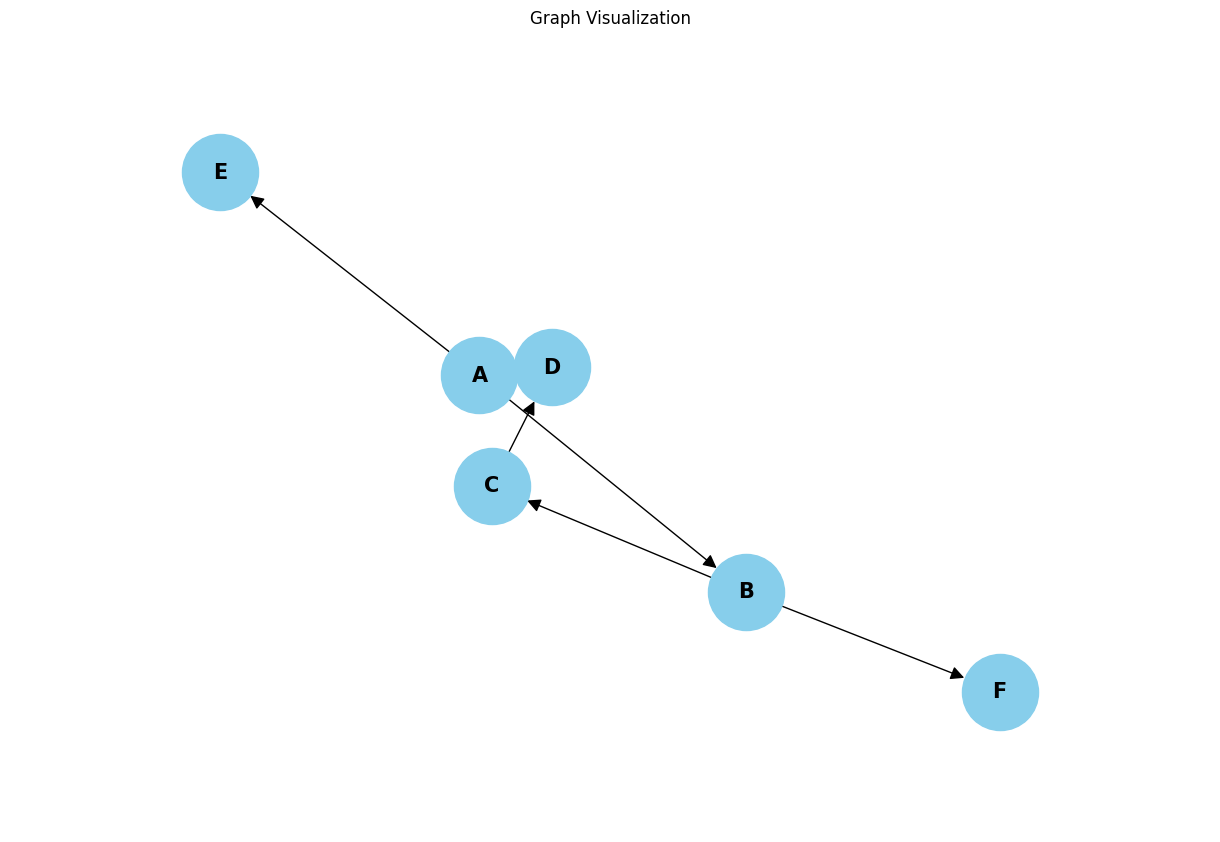

In [7]:
# Create a directed graph
g = Graph(directed=True)

# Add vertices
g.add_vertex('A')
g.add_vertex('B')
g.add_vertex('C')
g.add_vertex('D')
g.add_vertex('E')
g.add_vertex('F')

# Add edges
g.add_edge('A', 'B')
g.add_edge('B', 'C')
g.add_edge('C', 'D')
g.add_edge('D', 'A')  # Adding an edge to form a cycle
g.add_edge('A', 'E')
g.add_edge('B', 'F')


# Print the graph
print("Graph:")
print(g)

plot_graph(g)

In [ ]:
# Prompt: You are an expert software developer or site reliability engineer and your job is to ensure that this code runs effectively quickly at scale and securely. Please review the code it, and find any issues that need to be fixed or updated.

import threading

class Graph:
    def __init__(self, directed=False):
        """
        Initialize the Graph.

        Parameters:
        - directed (bool): Specifies whether the graph is directed. Default is False (undirected).

        Attributes:
        - graph (dict): A dictionary to store vertices and their adjacent vertices.
        - directed (bool): Indicates whether the graph is directed.
        - lock (threading.Lock): A lock to ensure thread-safe operations.
        """
        self.graph = {}
        self.directed = directed
        self.lock = threading.Lock()
    
    def add_vertex(self, vertex):
        """
        Add a vertex to the graph.

        Parameters:
        - vertex: The vertex to add. It must be hashable.

        Raises:
        - ValueError: If the vertex is not a hashable type.
        """
        if not isinstance(vertex, (int, str, tuple)):
            raise ValueError("Vertex must be a hashable type.")
        with self.lock:
            if vertex not in self.graph:
                self.graph[vertex] = []
    
    def add_edge(self, src, dest):
        """
        Add an edge from src to dest. If the graph is undirected, also add from dest to src.

        Parameters:
        - src: The source vertex.
        - dest: The destination vertex.

        Raises:
        - KeyError: If either src or dest vertices do not exist in the graph.
        """
        if src not in self.graph or dest not in self.graph:
            raise KeyError("Both vertices must exist in the graph.")
        with self.lock:
            if dest not in self.graph[src]:  # Check to prevent duplicate edges
                self.graph[src].append(dest)
            if not self.directed and src not in self.graph[dest]:
                self.graph[dest].append(src)
    
    def remove_edge(self, src, dest):
        """
        Remove an edge from src to dest. If the graph is undirected, also remove from dest to src.

        Parameters:
        - src: The source vertex.
        - dest: The destination vertex.
        """
        with self.lock:
            if src in self.graph and dest in self.graph[src]:
                self.graph[src].remove(dest)
            if not self.directed and dest in self.graph and src in self.graph[dest]:
                self.graph[dest].remove(src)
    
    def remove_vertex(self, vertex):
        """
        Remove a vertex and all edges connected to it.

        Parameters:
        - vertex: The vertex to be removed.
        """
        with self.lock:
            if vertex in self.graph:
                # Remove any edges from other vertices to this one
                for adj in list(self.graph):
                    if vertex in self.graph[adj]:
                        self.graph[adj].remove(vertex)
                # Remove the vertex entry itself
                del self.graph[vertex]
    
    def get_adjacent_vertices(self, vertex):
        """
        Get a list of vertices adjacent to the specified vertex.

        Parameters:
        - vertex: The vertex whose neighbors are to be retrieved.

        Returns:
        - List of adjacent vertices. Returns an empty list if vertex is not found.
        """
        return self.graph.get(vertex, [])
    
    def has_cycle_util(self, v, visited, rec_stack):
        """
        Utility function for cycle detection.

        Parameters:
        - v: The current vertex.
        - visited (dict): Dictionary to keep track of visited vertices.
        - rec_stack (dict): Dictionary to keep track of vertices in the recursion stack.

        Returns:
        - bool: True if a cycle is detected, False otherwise.
        """
        visited[v] = True
        rec_stack[v] = True
        for neighbor in self.graph[v]:
            if not visited[neighbor]:
                if self.has_cycle_util(neighbor, visited, rec_stack):
                    return True
            elif rec_stack[neighbor]:
                return True
        rec_stack[v] = False
        return False
    
    def has_cycle(self):
        """
        Check if the graph has a cycle.

        Returns:
        - bool: True if the graph has a cycle, False otherwise.
        """
        visited = {v: False for v in self.graph}
        rec_stack = {v: False for v in self.graph}
        for node in self.graph:
            if not visited[node]:
                if self.has_cycle_util(node, visited, rec_stack):
                    return True
        return False
    
    def __str__(self):
        """
        Provide a string representation of the graph's adjacency list for easy printing and debugging.

        Returns:
        - str: A string representation of the graph dictionary.
        """
        return str(self.graph)
